### About Data:
#### Retail based online company product sales data.

### Context: 
#### Company - UK-based and registered non-store online retail#### 
Products for selling - Mainly all-occasion gifts#### 
Customers - Most are wholesalers (local or international#### )
Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

In [1]:
# Import Libraries:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import gc
import datetime

%matplotlib inline
# Using ggplot's style
color=['blue']
plt.style.use('ggplot')

In [2]:
import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [3]:
# Loading Data:
# Specify encoding to deal with different formats

df = pd.read_csv("C:/Users/amitm/Desktop/New folder/Task Impetus/Class/Python/Case Study/ecommerce_data.csv",encoding = 'ISO-8859-1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Checking for missing values:

df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [7]:
# Checking out missing values in rows:

df[df.isnull().any(axis=1)].head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


In [8]:
# Change the invoice_date format - String to Timestamp format:

df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
# df_new without missing values:

df_no_missing = df.dropna()

In [11]:
# Check missing values for each column :

df_no_missing.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
# Change columns type - String to Int type :

df_no_missing['CustomerID'] = df_no_missing['CustomerID'].astype('int64')

In [13]:
df_no_missing.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [14]:
# Rename the dataframe to make code more readable:

df2 = df_no_missing.copy()

In [15]:
df2.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.00,406829,406829.00,406829.00
mean,12.06,2011-07-10 16:30:57.879207424,3.46,15287.69
min,-80995.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-06 15:02:00,1.25,13953.00
50%,5.00,2011-07-31 11:48:00,1.95,15152.00
75%,12.00,2011-10-20 13:06:00,3.75,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,248.69,NaN,69.32,1713.60


In [16]:
df2.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,406829,406829,406829,406829
unique,22190,3684,3896,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2077,2070,361878


In [17]:
df2[df2['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [18]:
df3=df2[df2['Quantity']>0]
df3[df3['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [19]:
df2[df2['Quantity']==df2['Quantity'].min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom


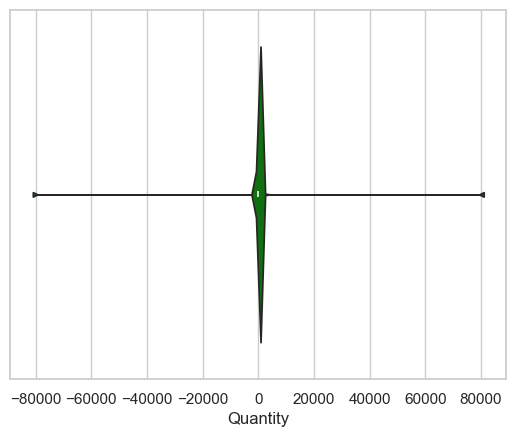

In [20]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df2["Quantity"], color='green')

In [21]:
# Remove negative quanitites:

df2 = df2[df2.Quantity > 0]
df2.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.00,397924,397924.00,397924.00
mean,13.02,2011-07-10 23:43:36.912475648,3.12,15294.32
min,1.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-07 11:12:00,1.25,13969.00
50%,6.00,2011-07-31 14:39:00,1.95,15159.00
75%,12.00,2011-10-20 14:33:00,3.75,16795.00
max,80995.00,2011-12-09 12:50:00,8142.75,18287.00
std,180.42,NaN,22.10,1713.17


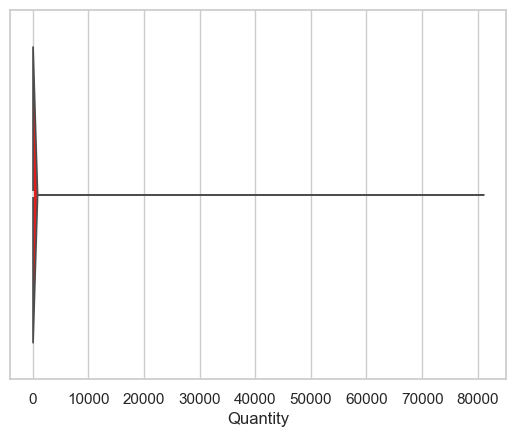

In [22]:
ax = sns.violinplot(x=df2["Quantity"], color= 'Red')

In [23]:
df2['AmountSpent'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [24]:
# Add Month, Day and Hour Colummns for further analysis:

df2['month_year'] = df2['InvoiceDate'].dt.to_period('M')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [25]:
getattr(df2['InvoiceDate'].dt, 'day')

0         1
1         1
2         1
3         1
4         1
         ..
541904    9
541905    9
541906    9
541907    9
541908    9
Name: InvoiceDate, Length: 397924, dtype: int32

In [26]:
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
L = ['year', 'month', 'day', 'dayofweek']
result = pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L), axis=1)

In [27]:
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

# Create a new DataFrame with the desired attributes ('year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter')
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear']
df_attributes = pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L), axis=1)

# Add the 'weekofyear' and 'quarter' columns to the df_attributes DataFrame
df_attributes['weekofyear'] = df2['InvoiceDate'].apply(lambda x: x.isocalendar()[1])
df_attributes['quarter'] = df2['InvoiceDate'].dt.quarter

# Join the df_attributes DataFrame to the df2 DataFrame
df2 = df2.join(df_attributes)

# Show the first few rows of the df2 DataFrame
print(df2.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  AmountSpent  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34   

  month_year  year  month  day  dayofweek  dayofyear  weekofyear  quarter  
0    2010-12  2010     12   

In [28]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [29]:
df2.dayofweek.unique()

array([2, 3, 4, 6, 0, 1])

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   month_year   397924 non-null  period[M]     
 10  year         397924 non-null  int32         
 11  month        397924 non-null  int32         
 12  day          397924 non-null  int32         
 13  dayofweek    397924 non-null  int32         
 14  dayofyear    397924 non-null  int32         
 15  weekofyear   397924 non-null  int64    

In [31]:
# Change Day of week:

df2['dayofweek'] = df2['dayofweek'] + 1
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [32]:
df2.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

### Exploring and Analysing the Data

In [33]:
# Consolidating the number of Sales Made per customer for each country:
# Use of InvoiceNo as the count for sales:

sales_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cust.columns = ['CustomerID', 'Country', "NumberOfSales"]
sales_per_cust.head(10)

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


In [34]:
df2[df2['CustomerID']==17841]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
2037,536557,21495,SKULLS AND CROSSBONES WRAP,25,2010-12-01 14:41:00,0.42,17841,United Kingdom,10.50,2010-12,2010,12,1,3,335,48,4
2038,536557,46000R,POLYESTER FILLER PAD 45x30cm,2,2010-12-01 14:41:00,1.45,17841,United Kingdom,2.90,2010-12,2010,12,1,3,335,48,4
2039,536557,46000S,POLYESTER FILLER PAD 40x40cm,1,2010-12-01 14:41:00,1.45,17841,United Kingdom,1.45,2010-12,2010,12,1,3,335,48,4
2040,536557,22731,3D CHRISTMAS STAMPS STICKERS,1,2010-12-01 14:41:00,1.25,17841,United Kingdom,1.25,2010-12,2010,12,1,3,335,48,4
2041,536557,21258,VICTORIAN SEWING BOX LARGE,1,2010-12-01 14:41:00,12.75,17841,United Kingdom,12.75,2010-12,2010,12,1,3,335,48,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537749,581334,23399,HOME SWEET HOME HANGING HEART,3,2011-12-08 12:07:00,0.85,17841,United Kingdom,2.55,2011-12,2011,12,8,4,342,49,4
537750,581334,22893,MINI CAKE STAND T-LIGHT HOLDER,12,2011-12-08 12:07:00,0.42,17841,United Kingdom,5.04,2011-12,2011,12,8,4,342,49,4
537751,581334,22371,AIRLINE BAG VINTAGE TOKYO 78,1,2011-12-08 12:07:00,4.25,17841,United Kingdom,4.25,2011-12,2011,12,8,4,342,49,4
537752,581334,22309,TEA COSY RED STRIPE,1,2011-12-08 12:07:00,2.55,17841,United Kingdom,2.55,2011-12,2011,12,8,4,342,49,4


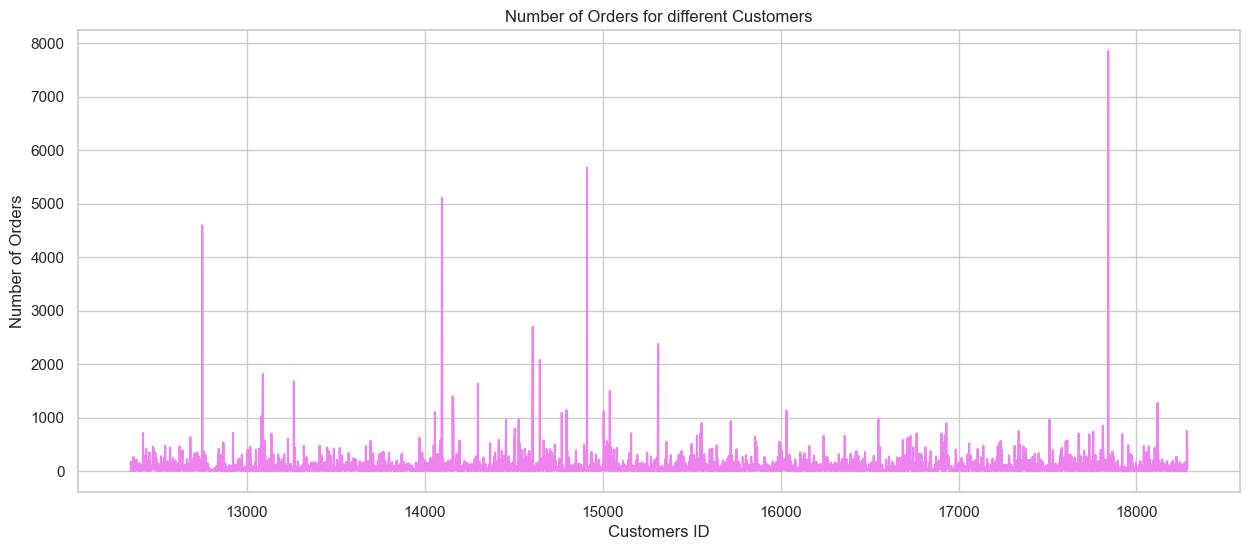

In [35]:
# Visualizing No. of Sales for Customers:

orders = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo, color="violet")
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

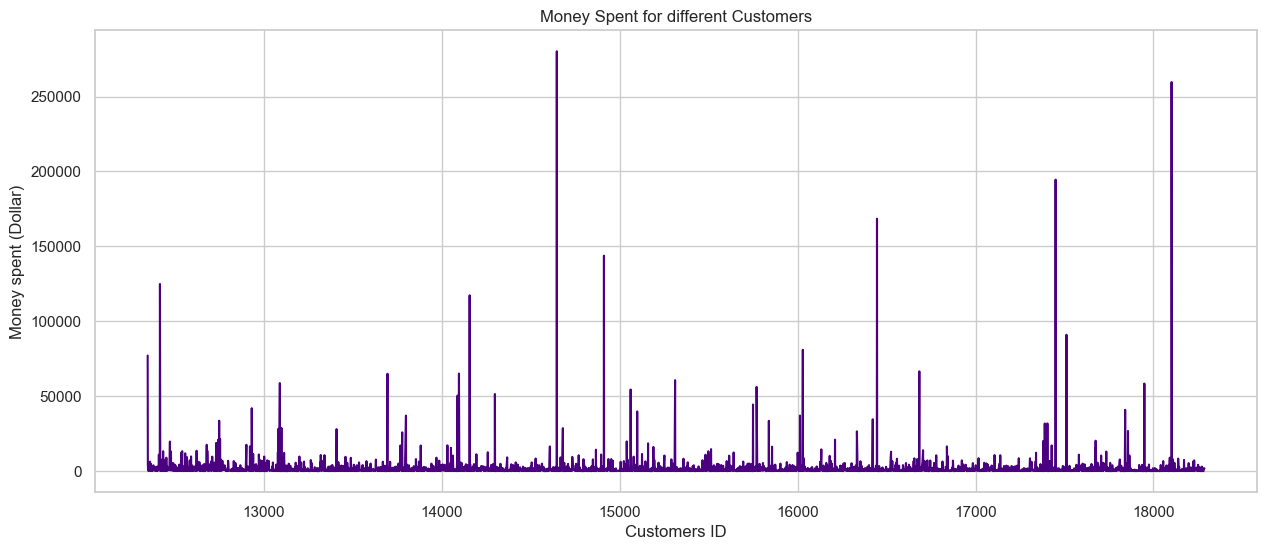

In [36]:
# Visualizing Money Spent for Customers:

money_spent = df2.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent,color='indigo')
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [37]:
# Consolidating the number of Sales Made per customer (Revenue):
# Use  of index=False, to indicate to groupby :

spent_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
spent_per_cust.columns = ['CustomerID', 'Country', "TotalSpent"]
spent_per_cust.head(10)

,CustomerID,Country,TotalSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


### Analysis on Purchasing Patterns

In [38]:
# Check data
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [39]:
# Insert a new column as 3rd row (index 2) with year_month by joining year with month from InvoiceDate field:

df2.insert(loc=2, column='year_month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Insert a new column as 6th column (index 5) with Hour extracted from InvoiceDate:

df2.insert(loc=5, column='hour', value=df2.InvoiceDate.dt.hour)

In [40]:
df2.head()

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [41]:
df2.groupby('InvoiceNo')['month_year'].unique()

InvoiceNo
536365    [2010-12]
536366    [2010-12]
536367    [2010-12]
536368    [2010-12]
536369    [2010-12]
            ...    
581583    [2011-12]
581584    [2011-12]
581585    [2011-12]
581586    [2011-12]
581587    [2011-12]
Name: month_year, Length: 18536, dtype: object

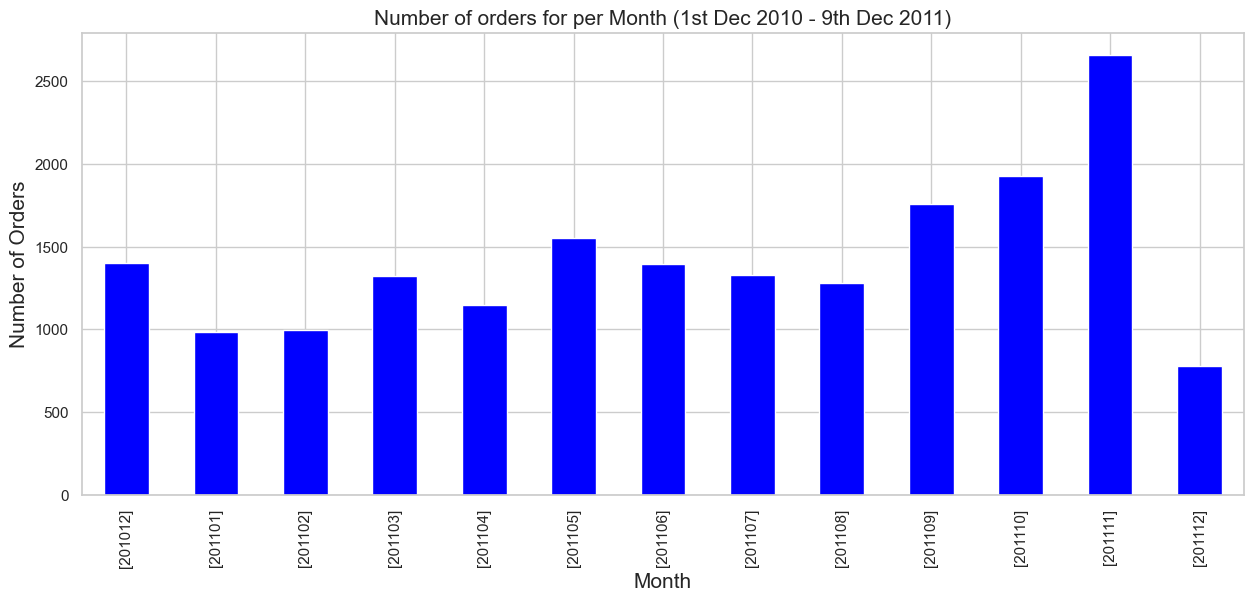

In [42]:
# Plot to show the number of orders per month :

ax = df2.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color='blue',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
#ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

<Axes: title={'center': 'Frequency of Order by Week'}, xlabel='Week'>

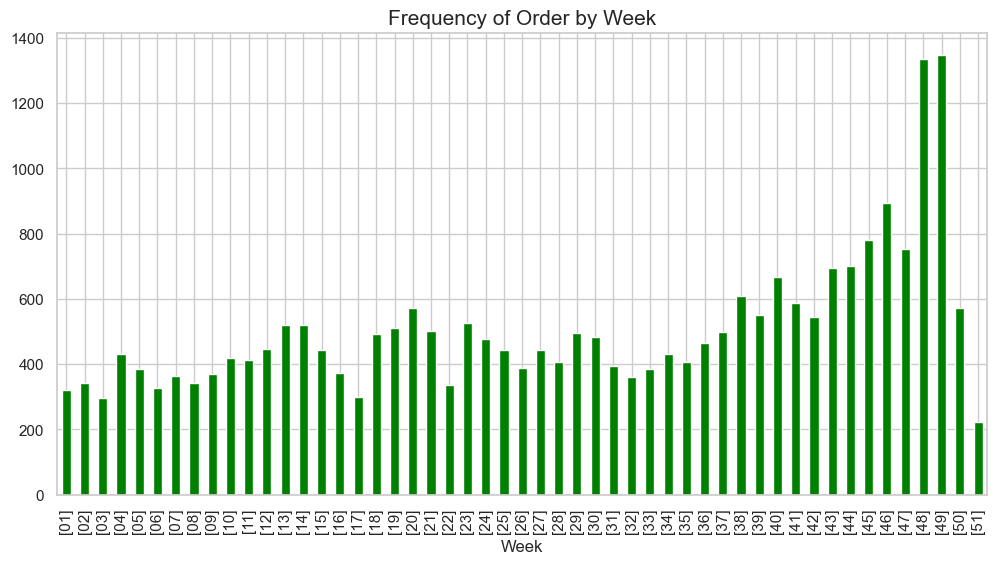

In [43]:
# Let's see number of orders per day of the week:

df['Week'] = df['InvoiceDate'].apply(lambda x: x.strftime('%W'))
plt.figure(figsize=(12,6))
plt.title("Frequency of Order by Week", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['Week'].unique()
InvoiceDate.value_counts().sort_index().plot.bar(color='green')

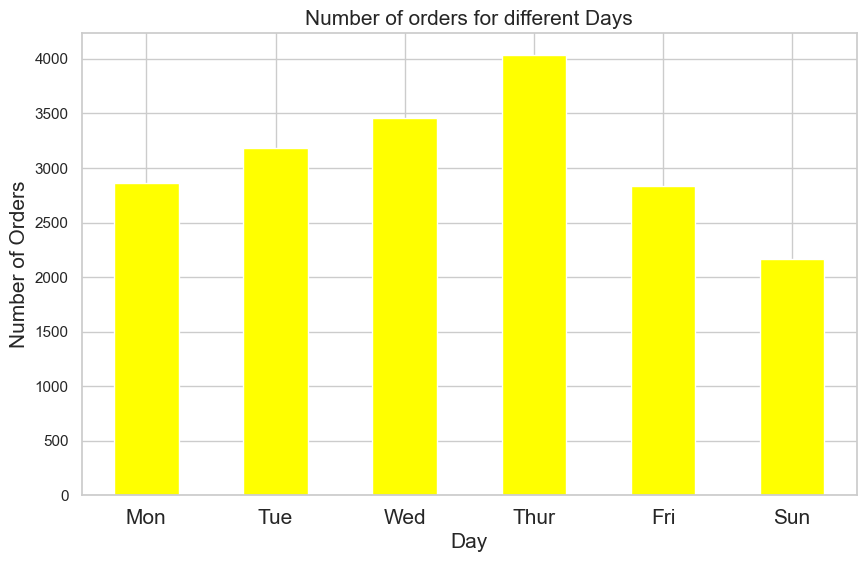

In [44]:
# Create a plot for the above:

ax = df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot(kind='bar',color='yellow',figsize=(10,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [45]:
df2.columns

Index(['InvoiceNo', 'StockCode', 'year_month', 'Description', 'Quantity',
       'hour', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country',
       'AmountSpent', 'month_year', 'year', 'month', 'day', 'dayofweek',
       'dayofyear', 'weekofyear', 'quarter'],
      dtype='object')

In [46]:
df2.groupby('InvoiceNo')['hour'].unique().value_counts()

hour
[12]        3129
[13]        2637
[11]        2276
[14]        2275
[10]        2226
[15]        2038
[9]         1394
[16]        1100
[8]          555
[17]         544
[18]         169
[19]         144
[7]           29
[20]          18
[11, 12]       1
[6]            1
Name: count, dtype: int64

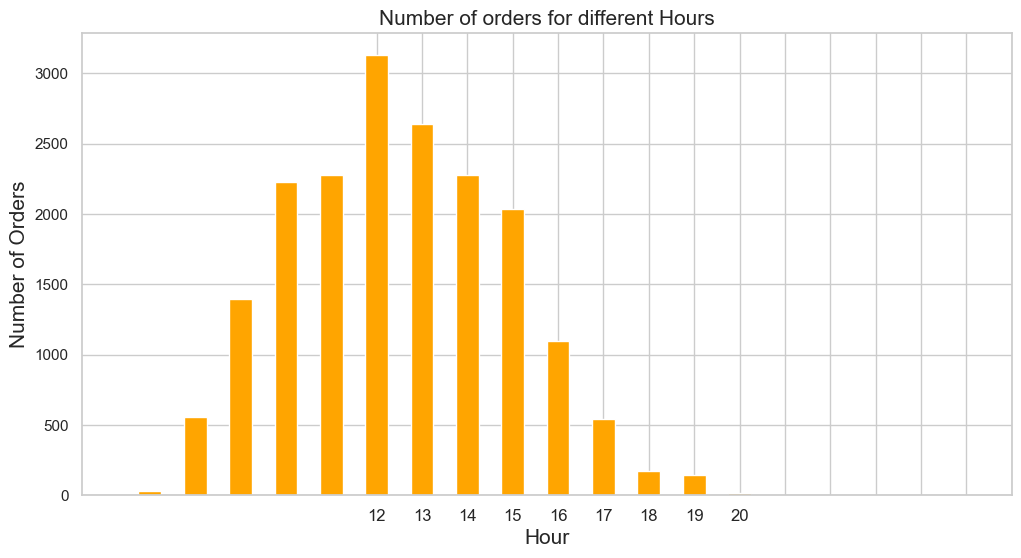

In [47]:
# Let's Plot the  number of orders per hour
orders_per_hour = df2.groupby('InvoiceNo')['hour'].apply(lambda x: x.unique()[0]).value_counts().sort_index()

plt.figure(figsize=(12,6))
# Plotting the bar chart with orange bars
orders_per_hour.plot(kind='bar', color='orange')
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)
plt.title('Number of orders for different Hours', fontsize=15)
plt.xticks(range(6, 21), rotation='horizontal', fontsize=12)
plt.show()

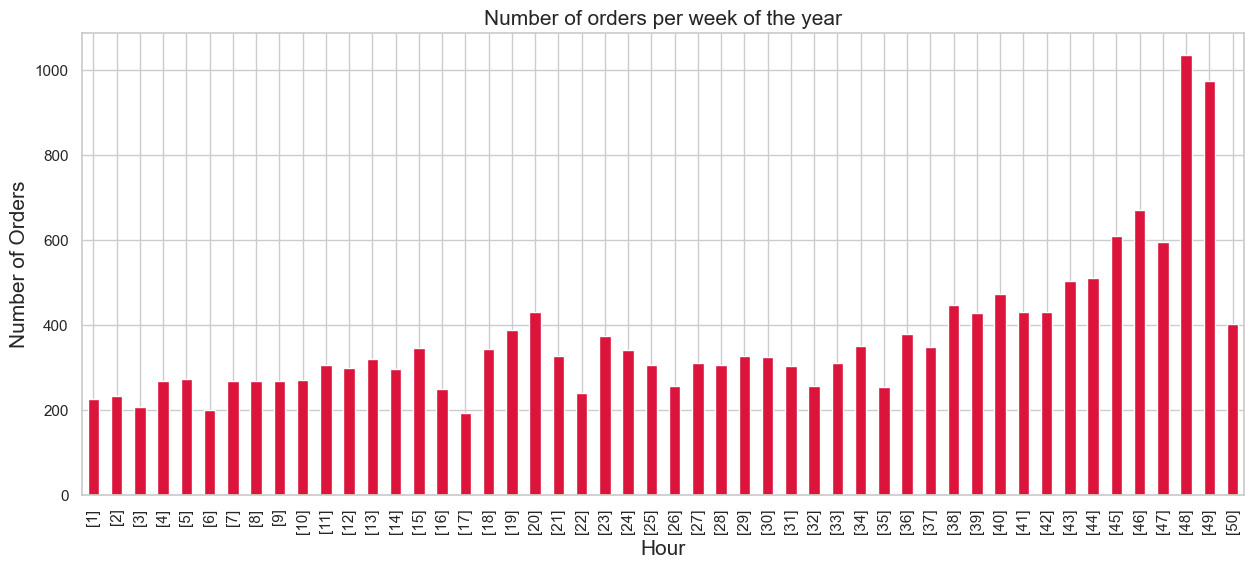

In [48]:
# Plot for Number of sales per week of the year:

ax = df2.groupby('InvoiceNo')['weekofyear'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color='crimson',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders per week of the year',fontsize=15)
#ax.set_xticklabels(range(0,52), rotation='horizontal', fontsize=15)
plt.show()

### Analyze Unit Prices of our items

In [49]:
df2.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

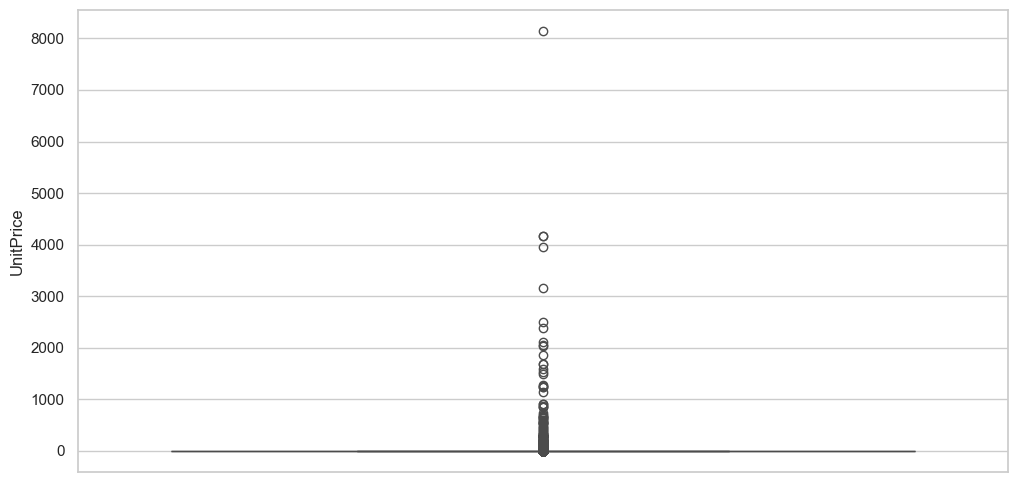

In [50]:
# Check distribution of unit price:

plt.subplots(figsize=(12,6))
sns.boxplot(df2.UnitPrice)
plt.show()

In [51]:
# Details on free items:

df_free = df2[df2.UnitPrice == 0]
print(len(df_free))
df_free.head()

40


,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,14,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010-12,2010,12,5,7,339,48,4
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,14,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010-12,2010,12,16,4,350,50,4
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,13,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010-12,2010,12,21,2,355,51,4
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1


In [52]:
# Check on when free items were given out:
df_free.year_month.value_counts().sort_index()

year_month
201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: count, dtype: int64

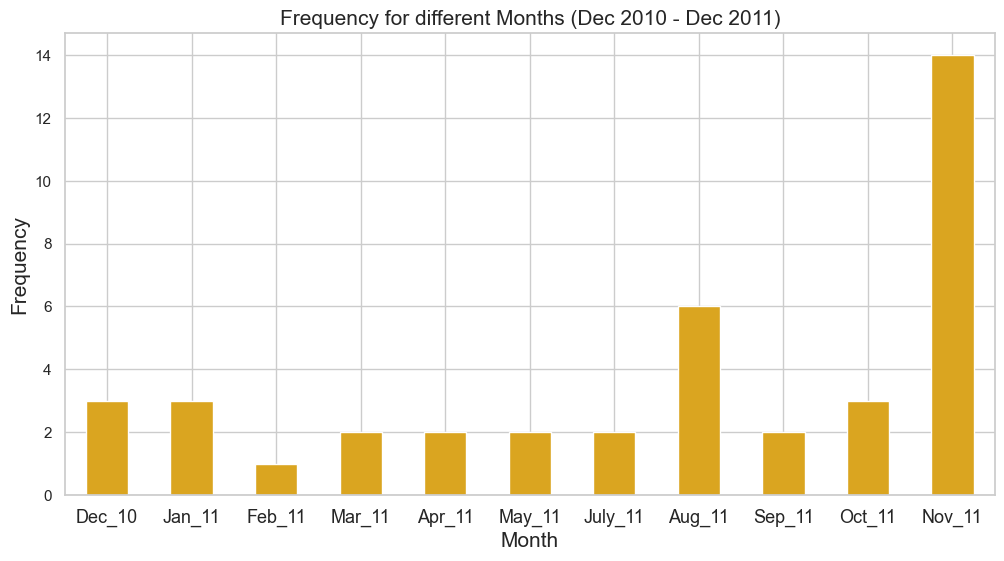

In [53]:
# Ploting for data on free items:

ax = df_free.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color='goldenrod')
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

On average, the company gave out 2-4 times FREE items to customers each month (Except in June 2011)

### Analysis per Country

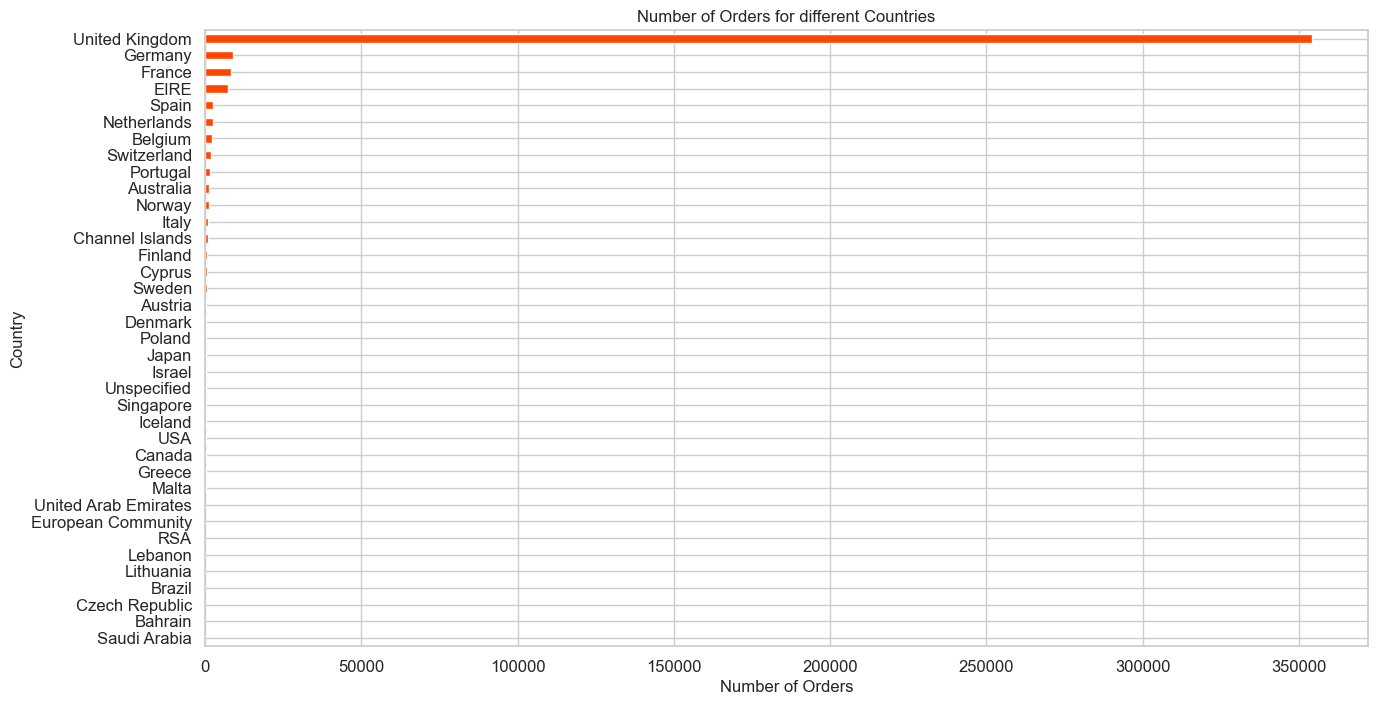

In [54]:
# Plot number of unique customers in each country (with UK):

group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color='orangered')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

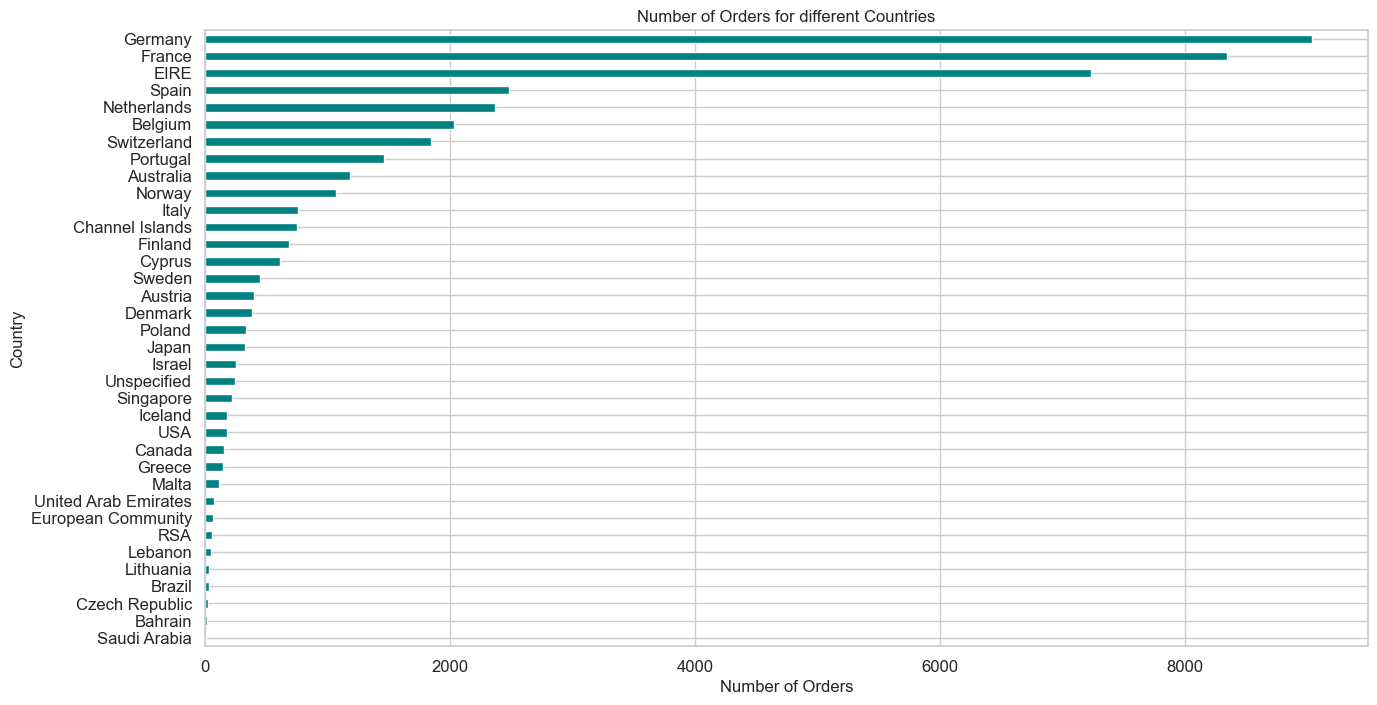

In [55]:
# Plot for number of unique customers excluding UK :

group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

plt.subplots(figsize=(15,8))
group_country_orders_without_uk.plot(kind='barh', fontsize=12, color='teal')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

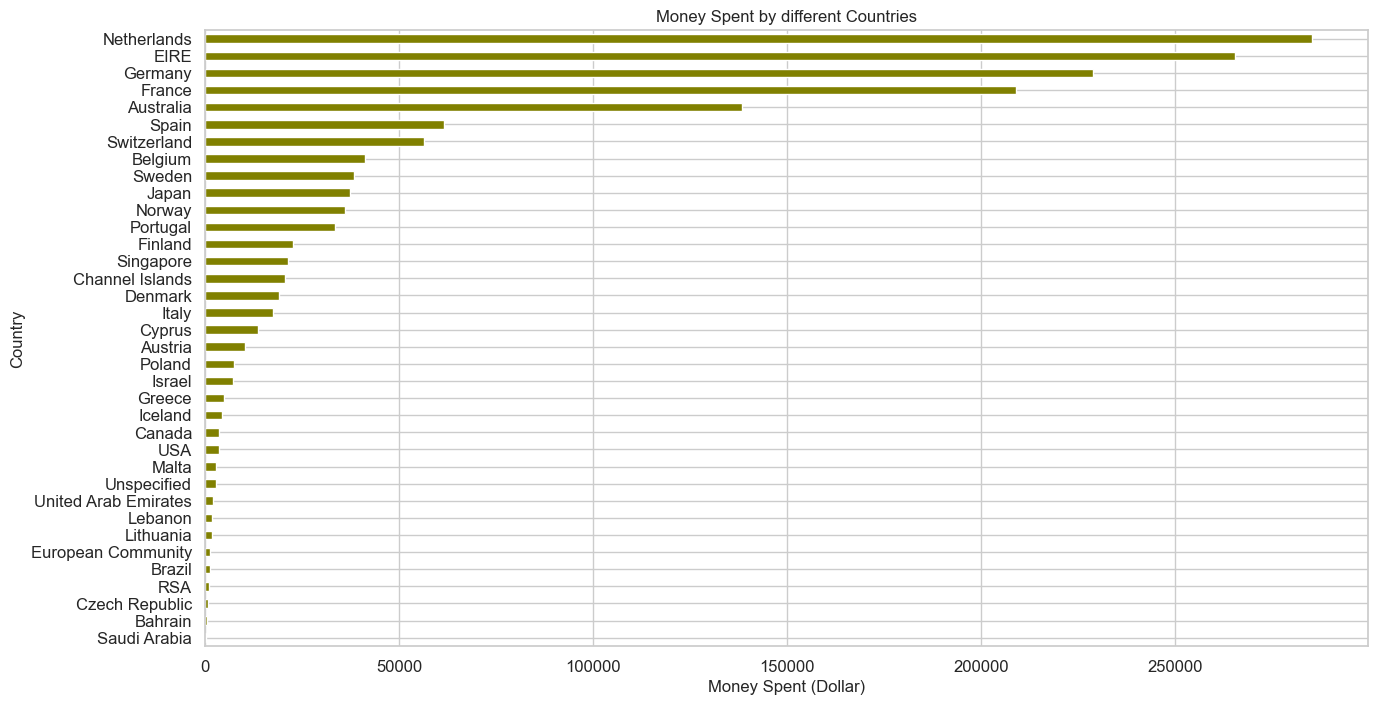

In [56]:
#Plot for Amount spent by each country (without UK)
group_country_amount_spent = df2.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color='olive')
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

###  Analysis on Repeat Customers:

In [57]:
# Get date range on data:

print('Date Range: %s to %s' % (df2['InvoiceDate'].min(), df2['InvoiceDate'].max()))
# Since Our data ends at Nov-30 2011, we're taking all of the transactions that occurred before December 01, 2011 
df2 = df2.loc[df2['InvoiceDate'] < '2011-12-01']

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [58]:
# Get total amount spent per invoice and associate it with CustomerID and Country:

invoice_customer_df = df2.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'AmountSpent': sum, 'CustomerID': max,'Country': max,}).reset_index()
invoice_customer_df.head(50)

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom
5,536370,2010-12-01 08:45:00,855.86,12583,France
6,536371,2010-12-01 09:00:00,204.00,13748,United Kingdom
7,536372,2010-12-01 09:01:00,22.20,17850,United Kingdom
8,536373,2010-12-01 09:02:00,259.86,17850,United Kingdom
9,536374,2010-12-01 09:09:00,350.40,15100,United Kingdom


In [59]:
# Sorting Amount spent, this gives the largest invoices:

invoice_customer_df.sort_values(by='AmountSpent', ascending=False).head(10)

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom
12438,567381,2011-09-20 10:12:00,22104.80,17450,United Kingdom
10869,563614,2011-08-18 08:51:00,21880.44,12415,Australia
5481,550461,2011-04-18 13:20:00,21535.90,15749,United Kingdom
14399,572035,2011-10-20 12:03:00,20277.92,14646,Netherlands
10637,563076,2011-08-11 16:12:00,19150.66,14646,Netherlands


In [60]:
invoice_customer_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID'])

In [61]:
# We set our index to our invoice date
# And use Grouper(freq='M') groups data by the index 'InvoiceDate' by Month
# We then group this data by CustomerID and count the number of unique repeat customers for 
#that month (data is the month end date)
# The filter fucntion allows us to subselect data by the rule in our lambda function i.e. those greater than 1 (repeat customers)

monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [62]:
# Number of Unique customers per month
monthly_unique_customers_df = df2.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [63]:
# Ratio of Repeat to Unique customers
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

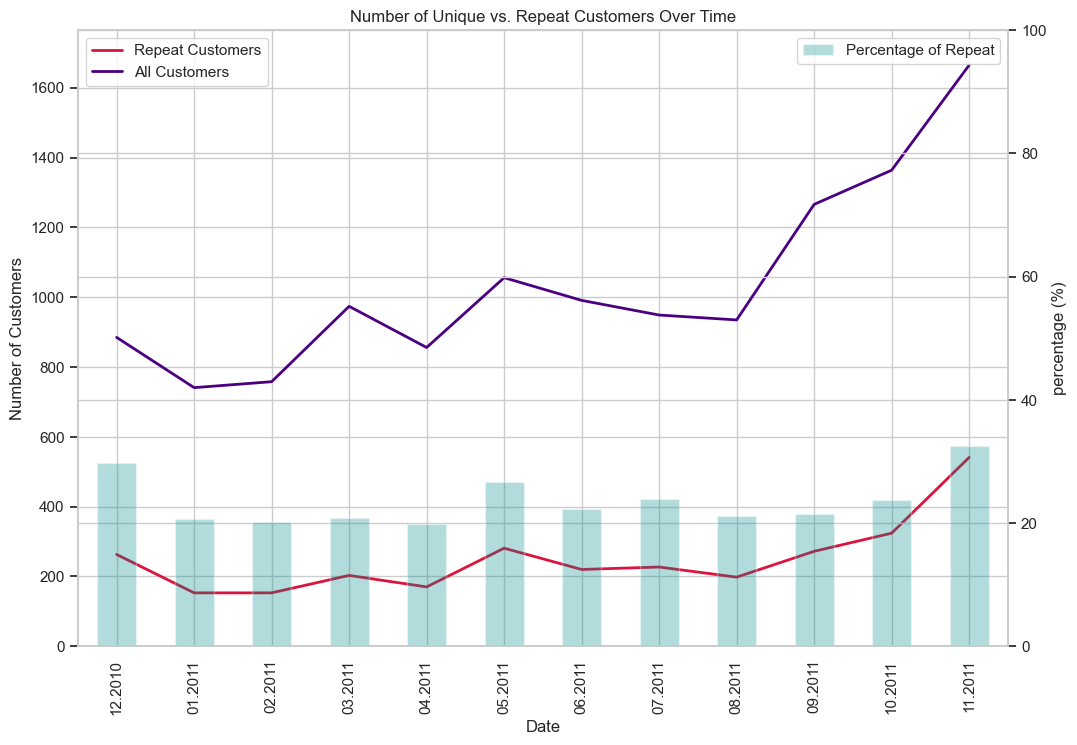

In [64]:
# Plotting this visually
# Note we're using a 2 scale y axis (left and right)

ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(12,8),color='crimson',linewidth=2.0)

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax,grid=True,color='indigo',linewidth=2.0)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='darkcyan',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customers_df.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45)

plt.show()

In [65]:
# Let's investigate the relationship between revenue and repeat customers
monthly_revenue_df = df2.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()

monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['AmountSpent']

# Let's get a percentage of the revenue from repeat customers to the overall monthly revenue
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    62.713792
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
Freq: M, Name: AmountSpent, dtype: float64

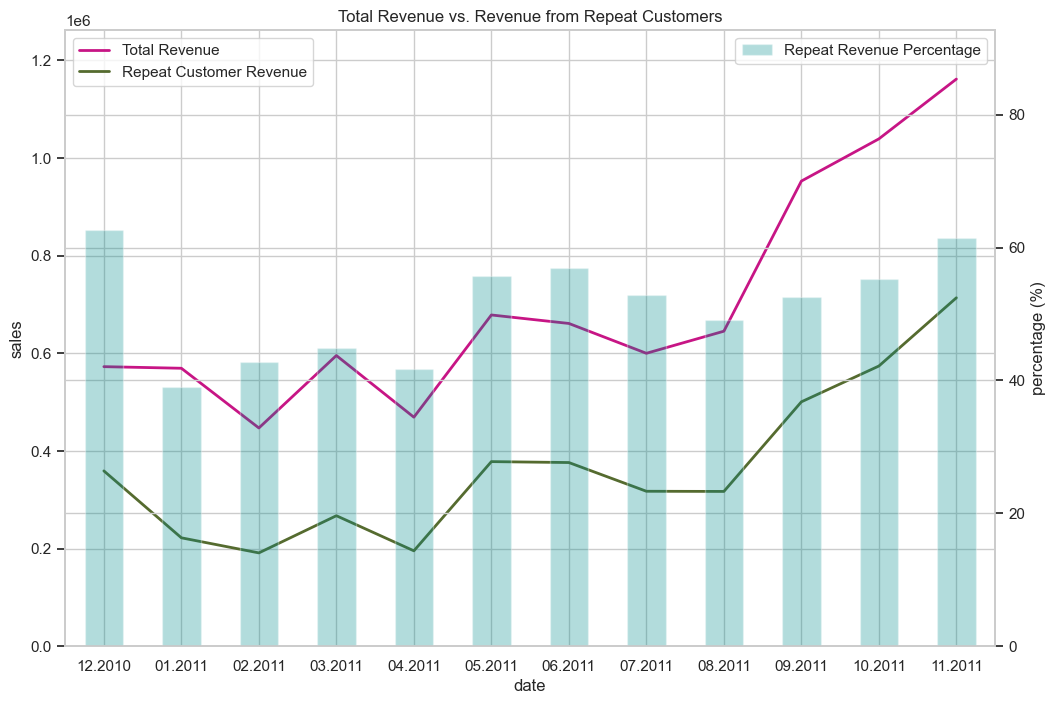

In [66]:
# Now let's plot this information we obtained above
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,8),color='mediumvioletred',linewidth=2.0)

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True,color='darkolivegreen',linewidth=2.0)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(ax=ax2,kind='bar',color='darkcyan',alpha=0.3)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index])

plt.show()

### Item Trends#### 
Let's count the number of items sold for each product for each period.

In [67]:
# Get quantity of each item sold per month:

date_item_df = df2.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()
date_item_df.head(15)

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
             10125        143
             10133        123
             10135        366
             11001         65
             15034         38
             15036        132
             15039         17
             15044A         6
             15044B         2
             15044C         7
Name: Quantity, dtype: int64

In [68]:
# Rank items by the last month's sales:

last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

,StockCode,Quantity
2371,84826,12551
1567,23084,12393
827,22197,8458
738,22086,5919
2488,85099B,5678
2385,84879,5190
1135,22578,4981
2498,85123A,4861
1134,22577,4582
2278,84077,4500


In [69]:
# Get data on top 5 items sale per month :

date_item_df = df.loc[df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()
date_item_df

InvoiceDate  StockCode
2010-12-31   22086         2453
             22197         2731
             84826          306
             85099B        2126
2011-01-31   22086           24
             22197         1809
             84826          480
             85099B        2639
2011-02-28   22086            5
             22197         2663
             84826           66
             85099B        3078
2011-03-31   22086           87
             22197         2798
             84826           60
             85099B        5281
2011-04-30   22086          -27
             22197         1856
             84826            1
             85099B        2452
2011-05-31   22086           17
             22197         6848
             23084         1131
             85099B        3617
2011-06-30   22086          344
             22197         2092
             23084         1693
             84826            4
             85099B        3676
2011-07-31   22086          377
             2219

In [70]:
# Generate a monthly trend of each of the top 5 items:
trending_items_df = date_item_df.reset_index().pivot(index='InvoiceDate', columns='StockCode', values='Quantity').fillna(0)

trending_items_df = trending_items_df.reset_index()
trending_items_df = trending_items_df.set_index('InvoiceDate')
#trending_items_df.columns = trending_items_df.columns.droplevel(1) # Remove this line
trending_items_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2453.0,2731.0,0.0,306.0,2126.0
2011-01-31,24.0,1809.0,0.0,480.0,2639.0
2011-02-28,5.0,2663.0,0.0,66.0,3078.0
2011-03-31,87.0,2798.0,0.0,60.0,5281.0
2011-04-30,-27.0,1856.0,0.0,1.0,2452.0
2011-05-31,17.0,6848.0,1131.0,0.0,3617.0
2011-06-30,344.0,2092.0,1693.0,4.0,3676.0
2011-07-31,377.0,1862.0,318.0,2.0,3126.0
2011-08-31,370.0,5416.0,1783.0,72.0,5401.0


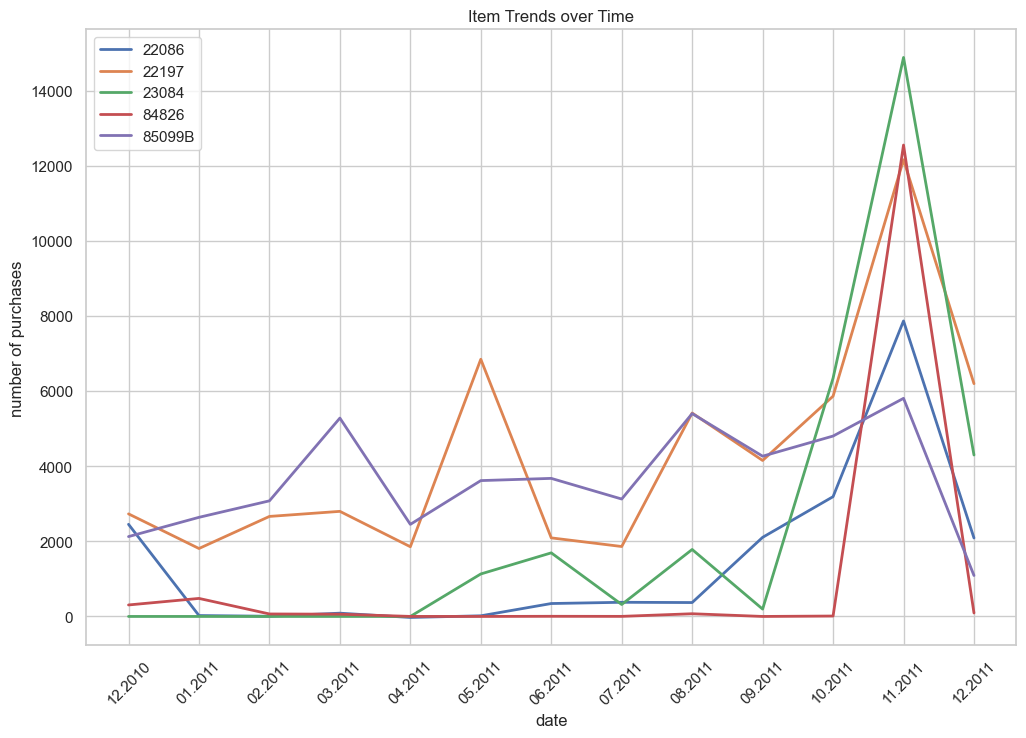

In [71]:
# Plot for monthly trend of each of the top 5 items:
ax = pd.DataFrame(trending_items_df.values).plot(figsize=(12,8), grid=True,linewidth=2.0)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')
ax.legend(trending_items_df.columns, loc='upper left')
plt.xticks(range(len(trending_items_df.index)), [x.strftime('%m.%Y') for x in trending_items_df.index], rotation=45)
plt.show()